In [20]:
from rxitect.models.vanilla.generator import VanillaGenerator
from rxitect.structs.vocabulary import SelfiesVocabulary
from rdkit.Chem import Draw
from rdkit import Chem
from typing import List

import torch
import selfies as sf
import numpy as np

# Helper methods to handle SELFIE tensors

In [24]:
class SelfiesTensorHandler:
    def __init__(self, vocabulary: SelfiesVocabulary) -> None:
        self.voc = vocabulary
    
    def selfies_tensor_to_smiles(self, selfies_tensor: torch.Tensor) -> List[str]:
        """
        Accepts a list of SELFIES encoded in tensor form, and decodes them
        to a SMILES string representing a molecule.
        
        Args:
            selfies_tensor: A tensor containing encoded SELFIES.
        Returns:
            A decoded SMILES string representing a molecule.
        """
        dec_sampled = [self.voc.decode(x) for x in selfies_tensor]
        smiles = [sf.decoder(x) for x in dec_sampled]
        return smiles
    
    def draw_sampled_selfies(self, selfies_tensor: torch.Tensor) -> None:
        """
        Helper function that takes generated encoded SELFIES tensors,
        decodes them to SMILES and draws them on screen.
        """
        smiles = self.selfies_tensor_to_smiles(selfies_tensor)
        Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in np.random.choice(smiles, size=50)])


In [2]:
voc = SelfiesVocabulary(vocabulary_file_path="../data/processed/selfies_voc.txt")
gen_RL = VanillaGenerator(voc=voc)
gen = VanillaGenerator(voc=voc)

In [16]:
handler = SelfiesTensorHandler(vocabulary=voc)

In [3]:
gen_RL.load_state_dict(torch.load("../models/obj3_ra=xgb_dev.pkg"))
gen.load_state_dict(torch.load("../models/fine_tuned_selfies_rnn.ckpt")["state_dict"])

<All keys matched successfully>

In [5]:
gen_RL.eval()
gen.eval()

VanillaGenerator(
  (embed): Embedding(86, 128)
  (rnn): LSTM(128, 512, num_layers=3, batch_first=True)
  (linear): Linear(in_features=512, out_features=86, bias=True)
)

In [13]:
base_samples = gen.sample(1000)
rl_samples = gen_RL.sample(1000)

In [18]:
base_smiles = handler.selfies_tensor_to_smiles(base_samples)
rl_smiles = handler.selfies_tensor_to_smiles(rl_samples)

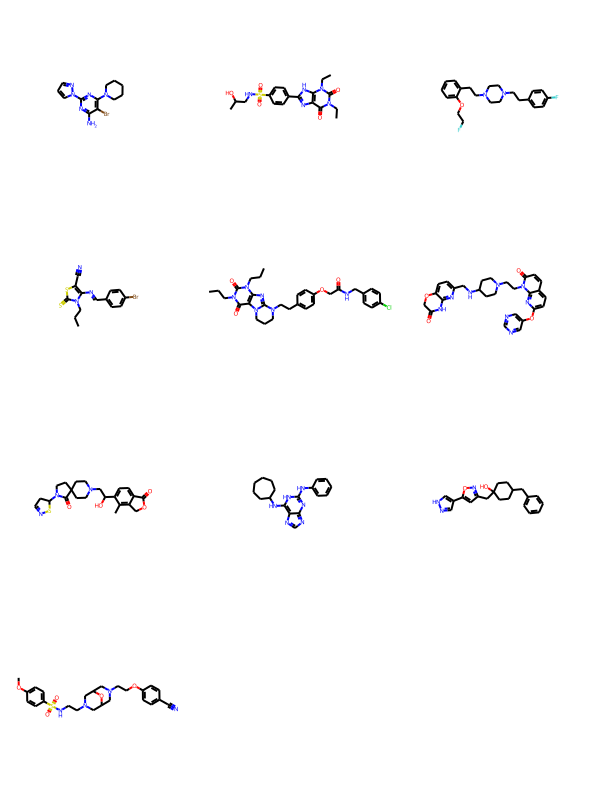

In [22]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in np.random.choice(base_smiles, size=10)])

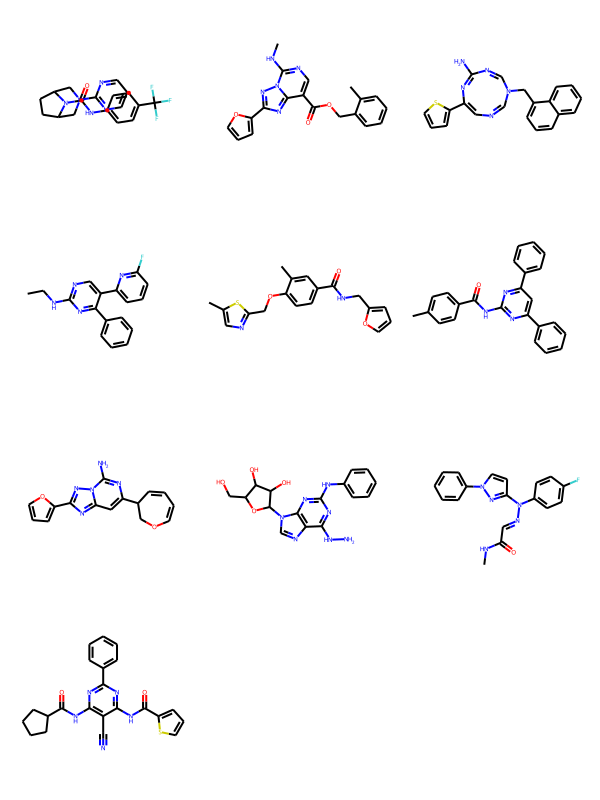

In [30]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in np.random.choice(rl_smiles, size=10)])

In [34]:
base_smiles[:10]

['O=C(C1=CC=CC=C1)N2CCCC3(CCN(C(=O)N4CCCN(C5CCC5)CC4)C3)C2',
 'CN1C(SCCCN2CCC3(CC3C4=CC=C(C(F)(F)F)C=C4)C2)=NN=C1C5=CC=CC(C(N)=O)=C5',
 'N#CC1=CC=C(CN2C=NC=C2CNC3CCN(C(=O)C4=CC=CN=C4N)C3=O)C=C1',
 'O=S(=O)(C1=CC=C(N2CCC2)C=C1)C3(F)CCN(CCC4=CC=C(F)C=C4F)CC3',
 'N#CC1=CC(N2CCN(CCN3CC4=CC=CC=C4C3)C2=O)=CC=C1F',
 'O=C1OCC2=CC(CCN3CCN(C(=O)CC4=CC=C(N5C=NN=N5)C=N4)CC3)=CC=C21',
 'CC1=CC(O)=C2C=CC(N)=NC2=N1',
 'CCCN1C(=O)[NH1]C=2[NH1]C(C3=CC=C(C=CC(=O)OC)C=C3)=NC=2C1=O',
 'CC(NC(=O)C1(N)CCN(C2=NC=NC=3[NH1]C=CC2=3)CC1)C4=CC=CC=C4',
 'O=C(NC1=NC(C2=CC=CC=C2)=NC3=NN(CC4=CC=CC=C4)C=C13)C5=CC=CC(Cl)=C5']